# Importações

In [1]:
# Importação das bibliotecas
import pandas as pd
import matplotlib

In [2]:
# Importação do banco de dados CSV
dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")

C:\Users\Usuário\AppData\Local\Temp\ipykernel_8672\3544363823.py:2: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  dados = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\Analise_Dados\DadosVacinaAM.csv', sep=";")


In [3]:
# Listagem das colunas para consulta
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708357 entries, 0 to 1708356
Data columns (total 32 columns):
 #   Column                                    Dtype  
---  ------                                    -----  
 0   document_id                               object 
 1   paciente_id                               object 
 2   paciente_idade                            float64
 3   paciente_dataNascimento                   object 
 4   paciente_enumSexoBiologico                object 
 5   paciente_racaCor_codigo                   float64
 6   paciente_racaCor_valor                    object 
 7   paciente_endereco_coIbgeMunicipio         object 
 8   paciente_endereco_coPais                  object 
 9   paciente_endereco_nmMunicipio             object 
 10  paciente_endereco_nmPais                  object 
 11  paciente_endereco_uf                      object 
 12  paciente_endereco_cep                     object 
 13  paciente_nacionalidade_enumNacionalidade  object 
 14  es

# Tratamento dos dados

In [4]:
# Seleção das colunas a serem analisadas neste projeto
dados = dados.loc[:, ['paciente_idade','paciente_enumSexoBiologico','paciente_racaCor_valor','paciente_endereco_nmMunicipio','vacina_categoria_nome','vacina_fabricante_nome','vacina_dataAplicacao','vacina_descricao_dose']]

# Filtro a partir da 1ª dose
dados = dados[dados['vacina_descricao_dose'] == '1ª Dose']

# Retirada de pacientes com erro de digitação na idade
dados = dados[dados['paciente_idade'] != 221.0]

# Mesclar nomes iguais de coluna vacina_fabricante_nome 


# Exibe o DataFrame resultante
dados

,paciente_idade,paciente_enumSexoBiologico,paciente_racaCor_valor,paciente_endereco_nmMunicipio,vacina_categoria_nome,vacina_fabricante_nome,vacina_dataAplicacao,vacina_descricao_dose
0,29.0,F,AMARELA,MANAUS,Faixa Etária,PFIZER,2021-10-21,1ª Dose
1,13.0,F,PARDA,MANAUS,Faixa Etária,PFIZER,2021-08-27,1ª Dose
2,77.0,F,SEM INFORMACAO,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-02-05,1ª Dose
3,66.0,M,BRANCA,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-03-05,1ª Dose
5,4.0,M,PARDA,MANAUS,NaN,SINOVAC/BUTANTAN,2022-11-19,1ª Dose
...,...,...,...,...,...,...,...,...
1708344,31.0,M,SEM INFORMACAO,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-07-21,1ª Dose
1708345,49.0,M,AMARELA,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-06-13,1ª Dose
1708346,57.0,M,SEM INFORMACAO,MANAUS,Faixa Etária,PFIZER,2021-07-28,1ª Dose
1708347,53.0,M,PARDA,MANAUS,Faixa Etária,ASTRAZENECA/FIOCRUZ,2021-06-09,1ª Dose


In [ ]:
# Juntar nomes iguais de coluna vacina_fabricante_nome 

## Quem são as pessoas vacinadas no estado do Amazonas?

In [18]:
# Quantidade de aplicações de 1ª dose da vacina por Idade, em porcentagem
idade = dados.paciente_idade.value_counts()
tt_idade = idade.sum()
porcent_idade = (idade/tt_idade)*100
#porcent_idade.plot(kind='bar')

<Axes: title={'center': 'Vacinas 1ª dose por Raça, em porcentagem{/n} Amazonas'}>

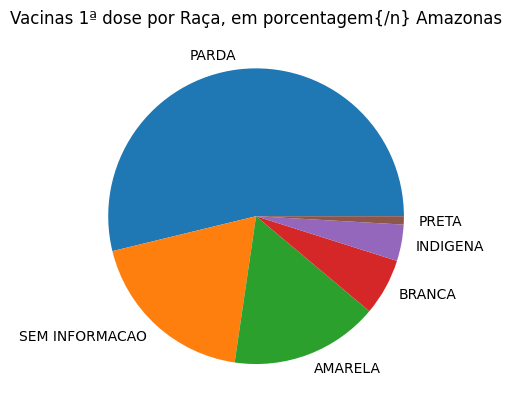

In [25]:
# Quantidade de aplicações de 1ª dose da vacina por Raça, em porcentagem
raça = dados.paciente_racaCor_valor.value_counts(normalize=True)
tt_raça = raça.sum()
porcent_raça = (raça/tt_raça)*100
porcent_raça.plot(kind='pie', title='Vacinas 1ª dose por Raça, em porcentagem', ylabel='')

<Axes: >

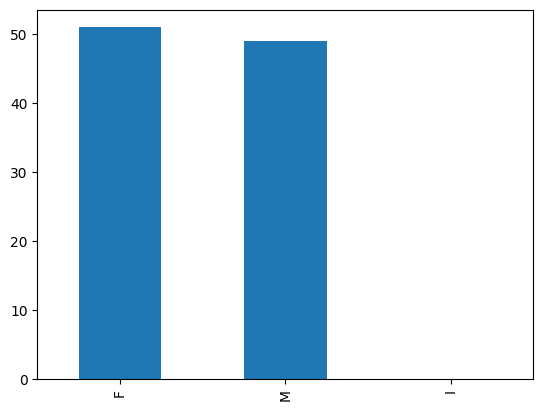

In [7]:
# Quantidade de aplicações de 1ª dose da vacina por sexo, em porcentagem
sexo = dados.paciente_enumSexoBiologico.value_counts(normalize=True)
tt_sexo = sexo.sum()
porcent_sexo = (sexo/tt_sexo)*100
porcent_sexo
porcent_sexo.plot(kind='bar')

In [8]:
# Quantidade de aplicações de 1ª dose da vacina por Município, em porcentagem
tt_munic = dados.paciente_endereco_nmMunicipio.value_counts()
tt_pac = tt_munic.sum()
porcent_munic = (tt_munic/tt_pac)*100
porcent_munic

MANAUS             54.811331
ITACOATIARA         2.613989
PARINTINS           2.426620
MANACAPURU          2.391441
TEFE                1.878126
                     ...    
FERREIROS           0.000153
LAPA                0.000153
RIO FORMOSO         0.000153
CORONEL VIVIDA      0.000153
ANITA GARIBALDI     0.000153
Name: paciente_endereco_nmMunicipio, Length: 2062, dtype: float64

## Problema

In [15]:
# Verificação das soma total de 1ª doses de vacinas aplicadas, em porcentagem
fabric = dados.vacina_fabricante_nome.value_counts()
fabric

ASTRAZENECA/FIOCRUZ                    257239
PFIZER                                 187452
SINOVAC/BUTANTAN                       178699
Pendente Identificação                  13331
PFIZER - PEDI?TRICA                      6763
PFIZER - PEDIÁTRICA                      6233
Pendente Identifica??o                   3867
ASTRAZENECA                              3225
PFIZER - PEDIÁTRICA MENOR DE 5 ANOS      2285
JANSSEN                                   533
SINOVAC                                   476
Name: vacina_fabricante_nome, dtype: int64

In [9]:
# Quantidade total de aplicação da 1ª dose da vacina por população de risco, em porcentagem
pop_risco = dados.vacina_categoria_nome.value_counts()
tt_cat = pop_risco.sum()
porcent_pop_risco = (pop_risco/tt_cat)*100
porcent_pop_risco


Faixa Etária                                       74.475548
Povos e Comunidades Tradicionais                    5.947342
Trabalhadores de Saúde                              5.391464
Comorbidades                                        5.099307
Povos Indígenas                                     3.769257
Trabalhadores da Educação                           2.277956
Gestantes                                           0.649334
Forças de Segurança e Salvamento                    0.403818
Forças Armadas (membros ativos)                     0.366020
Trabalhadores de Transporte                         0.345733
Pessoas com Deficiência                             0.336024
População Privada de Liberdade                      0.225923
Puérperas                                           0.207717
Trabalhadores Portuários                            0.146339
Outros                                              0.127613
Trabalhadores de Limpeza Urbana                     0.093976
Funcionário do Sistema d

In [50]:
# Fabricante de vacina por população de risco
pop_risco = dados[(dados['vacina_categoria_nome'] != 'Faixa Etária')]
grupo_pop_risco = pop_risco.groupby('vacina_categoria_nome')['vacina_fabricante_nome'].value_counts()
grupo_trab = grupo_pop_risco['Trabalhadores de Saúde']
tt_trab = grupo_pop_risco['Trabalhadores de Saúde'].sum()
porcent_trab = (grupo_trab/tt_trab)*100
porcent_trab

vacina_fabricante_nome
SINOVAC/BUTANTAN          66.100659
ASTRAZENECA/FIOCRUZ       29.741116
PFIZER                     3.936324
ASTRAZENECA                0.192957
PFIZER - PEDI?TRICA        0.016080
JANSSEN                    0.006432
Pendente Identificação     0.006432
Name: vacina_fabricante_nome, dtype: float64

In [51]:
# Fabricante de vacina por população de risco
pop_risco = dados[(dados['vacina_categoria_nome'] != 'Faixa Etária')]
grupo_pop_risco = pop_risco.groupby('vacina_categoria_nome')['vacina_fabricante_nome'].value_counts()
grupo_comorb = grupo_pop_risco['Comorbidades']
tt_comorb = grupo_pop_risco['Comorbidades'].sum()
porcent_comorb = (grupo_comorb/tt_comorb)*100
porcent_comorb

vacina_fabricante_nome
SINOVAC/BUTANTAN                       57.517851
ASTRAZENECA/FIOCRUZ                    33.257395
PFIZER                                  7.099626
ASTRAZENECA                             1.400884
Pendente Identificação                  0.316219
Pendente Identifica??o                  0.278817
PFIZER - PEDI?TRICA                     0.057803
PFIZER - PEDIÁTRICA MENOR DE 5 ANOS     0.030602
PFIZER - PEDIÁTRICA                     0.027202
JANSSEN                                 0.010201
SINOVAC                                 0.003400
Name: vacina_fabricante_nome, dtype: float64

In [48]:
# Verificar primeira data de aplicação de vacina e apresentar as populações vacinadas
dados['vacina_dataAplicacao'] = pd.to_datetime(dados['vacina_dataAplicacao'], format='%Y-%m-%d')
dados_ord = dados.groupby(['vacina_dataAplicacao', 'vacina_categoria_nome']).size().reset_index(name='count')
dados_ord = dados_ord.sort_values(by='vacina_dataAplicacao')